# Task 3&4 🚩
In this task, we want you to use the [Bikes Dataset](https://drive.google.com/file/d/1PlgVA9ABSAq1hFmoW6ydqpTocr7BxfL9/view?usp=sharing) to practice the data cleaning&analysis process
 




## Data Cleaning Functions
> * head()
> * shape
> * info()
> * describe()
> * duplicated()
> * drop
> * isnull()
> * fillna

Extra resources:
>* [useful pandas functions](https://regenerativetoday.com/30-very-useful-pandas-functions-for-everyday-data-analysis-tasks/)
>* [Pandas Documentation](https://pandas.pydata.org/docs/getting_started/index.html)
>* [Pandas Sheet Cheat](https://drive.google.com/file/d/1dqxMzrPlI0YSt4W2MQQPvji7XqkSXh93/view?usp=sharing)

# STEP 1:  **Importing Libraries & Load Data**

In [ ]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap #to split labels in lines

## Google drive
If you want to get or save files from/to your google drive 
>Here is the snippet code to do this ( after you run the below cell you should give the permission to google colab )

In [ ]:
#mount drive to read the csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the csv file 
data = pd.read_csv('/content/drive/MyDrive/AI-Tasks/bike_trips.csv')

# STEP 2: **Exploring Data**

In [ ]:
#example: how many rows and columns are in the data? 
data.shape #shape to show how many rows and colomns in the data set

(183412, 16)

In [ ]:
#head() to show the first 5 rows
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
#info() shows the sum of rows and the data type for each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
#isnull().sum() to show the sum of null values in each column
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [ ]:
#duplicated().sum() its shows the sum of duplicated values
data.duplicated().sum()

0

In [ ]:
#to show the count of rows in each category of user_type column
data['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [ ]:
#the count of rows in each category of member_gender
data['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

##Extra cell: Assess data
From the data exploring that we did above here is our note:

> ##  1. unwanted columns (*why?*) ***Unimportant data***
1.   start_station_latitude
2.   start_station_longitude
2.   end_station_latitude
2.   end_station_longitude 
1.   bike_share_for_all_trip

> ## 2. Calculate the age from member_birth_year column, will lead to:
1.   delete member_birth_year column after the calculation
2.   have member_age column instead of member_birth_year
2.   delete the rows that have illogical member age 

> ## 3. null values
1.   start_station_id
1.   start_station_name
1.   end_station_id
2.   end_station_name
2.   member_age
2.   member_gender

> ## 4. wrong columns datatype
1.   start_station_id
1.   end_station_id
1.   user_type
2.   member_age
2.   member_gender
1.   start_time
2.   end_time

>  ## 5. seperation the day and hour from start_time and end_time columns

> ##   there is no duplicated values






# STEP 3: **Clean Data**

After assessing the dataset, we are ready to start **Data Cleaning** process:
1. unwanted columns
2. Calculate the age from member_birth_year column
3. null values
2. wrong columns datatype
1. seperation the day, month and hour from 
start_time and end_time columns




 ## 1. First problem: unwanted columns
----
will drop these colomns because it is Unimportant


In [ ]:
data.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'], inplace=True) #delete the 5 column that is useless in the data set
data.head() #the data set after solving the first problem

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [ ]:
#it will become 11 colomns after deleting 5 columns
data.shape 

(183412, 11)

 ### 2. Second problem: Calculate the age from member_birth_year column
 ---
 after calculating the age will delete  member_birth_year column

In [ ]:
#Create a new column member_age and assign to it the ages value from member_birth_year
data['member_age'] = (2022 - data['member_birth_year'])

In [ ]:
data.drop(columns=['member_birth_year'], inplace=True) #delete member_birth_year column 
data.head() #the data set after solving the second problem

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,38.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,50.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,33.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,48.0


In [ ]:
#the member_age description
data['member_age'].describe()

count    175147.000000
mean         37.193563
std          10.116689
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

In [ ]:
data.drop(data[data['member_age'] > 80].index, inplace = True) #delete rows with an member_age greater than 80 which is 212 rows
data['member_age'].describe() #the member_age description

count    174935.000000
mean         37.116855
std           9.864734
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          80.000000
Name: member_age, dtype: float64

 ### 3. Third problem: null values
 ---
* start_station_id
* start_station_name
* end_station_id
* end_station_name

The above columns have just 197 rows with null value so I will delete it becuase it is small set of data and it will not affect

* member_age: here we have 8265 rows with null value so the best thing is to calculate the mean() of the ages and assign it to the null values 
* member_gender: also here we have 8265 row with null value so I will assign 'other' to these values

In [ ]:
#drop the rows with null values in this 4 columns
data.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

In [ ]:
#fill the null values in column member_age with the mean of all ages
data['member_age'].fillna(data['member_age'].mean(), inplace=True)

In [ ]:
#fill the null values in column member_gender with value (Other)
data['member_gender'].fillna('Other', inplace=True)

In [ ]:
#the count of rows in each category after fill null values
data['member_gender'].value_counts()

Male      130331
Female     40765
Other      11907
Name: member_gender, dtype: int64

In [ ]:
#info() shows the sum of rows and the data type for each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183003 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        183003 non-null  int64  
 1   start_time          183003 non-null  object 
 2   end_time            183003 non-null  object 
 3   start_station_id    183003 non-null  float64
 4   start_station_name  183003 non-null  object 
 5   end_station_id      183003 non-null  float64
 6   end_station_name    183003 non-null  object 
 7   bike_id             183003 non-null  int64  
 8   user_type           183003 non-null  object 
 9   member_gender       183003 non-null  object 
 10  member_age          183003 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 16.8+ MB


In [ ]:
#the sum of null values in each column after the cleaning
data.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_gender         0
member_age            0
dtype: int64

### 4. Forth problem: wrong columns datatype
---
* From float to int:
1.   start_station_id
1.   end_station_id
2.   member_age

* From object to category:
1.   user_type
2.   member_gender

* From object to datetime:
1.   start_time
2.   end_time


In [ ]:
#data types before
data.dtypes

duration_sec            int64
start_time             object
end_time               object
start_station_id      float64
start_station_name     object
end_station_id        float64
end_station_name       object
bike_id                 int64
user_type              object
member_gender          object
member_age            float64
dtype: object

In [ ]:
#convert the columns to int and category
data = data.astype({"start_station_id":'int', "end_station_id":'int', "member_age":'int', "member_gender":'category', "user_type":'category'})

In [ ]:
#convert the columns to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [ ]:
#data types after 
data.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id               int64
start_station_name            object
end_station_id                 int64
end_station_name              object
bike_id                        int64
user_type                   category
member_gender               category
member_age                     int64
dtype: object

### 5. Fifth problem: seperation the day and hour from start_time and end_time columns
---

In [ ]:
#create new columns and use dt.strftime() 
data['start_day'] = data['start_time'].dt.strftime('%d')
data['day_name'] = data['start_time'].dt.strftime('%A')
data['start_hour'] = data['start_time'].dt.strftime('%H')

data['end_day'] = data['end_time'].dt.strftime('%d')
data['end_hour'] = data['end_time'].dt.strftime('%H')

In [ ]:
#the data set after solving the fifth problem
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age,start_day,day_name,start_hour,end_day,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,38,28,Thursday,17,01,08
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,Other,37,28,Thursday,18,01,06
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,50,28,Thursday,12,01,05
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,33,28,Thursday,17,01,04
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,48,28,Thursday,23,01,00


##  The dataset AFTER solving problems
---

In [ ]:
#the data set shape after solving the problems
data.shape

(183003, 16)

In [ ]:
#the first 10 rows of the data set after solving the problems
data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age,start_day,day_name,start_hour,end_day,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,38,28,Thursday,17,01,08
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,Other,37,28,Thursday,18,01,06
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,50,28,Thursday,12,01,05
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,33,28,Thursday,17,01,04
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,48,28,Thursday,23,01,00
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,63,28,Thursday,23,01,00
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,39,28,Thursday,23,01,00
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,33,28,Thursday,23,01,00
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,34,28,Thursday,23,01,00
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,121,Mission Playground,6488,Subscriber,Male,30,28,Thursday,23,01,00


In [ ]:
#the data set description after solving the problems
data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,member_age,start_day,day_name,start_hour,end_day,end_hour
count,183003.000000,183003,183003,183003.000000,183003,183003.000000,183003,183003.000000,183003,183003,183003.000000,183003,183003,183003,183003,183003
unique,NaN,182992,182988,NaN,329,NaN,329,NaN,2,3,NaN,28,7,24,28,24
top,NaN,2019-02-06 21:35:57.574000,2019-02-11 18:53:55.082000,NaN,Market St at 10th St,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,Subscriber,Male,NaN,28,Thursday,17,28,17
freq,NaN,2,2,NaN,3900,NaN,4854,NaN,163215,130331,NaN,9816,35150,21834,9817,21266
first,NaN,2019-02-01 00:00:20.636000,2019-02-01 00:04:52.058000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-02-28 23:59:18.548000,2019-03-01 08:01:55.975000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,726.161801,NaN,NaN,138.614974,NaN,136.289651,NaN,4473.061797,NaN,NaN,37.114654,NaN,NaN,NaN,NaN,NaN
std,1795.987632,NaN,NaN,111.782241,NaN,111.532795,NaN,1665.238411,NaN,NaN,9.641281,NaN,NaN,NaN,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,3.000000,NaN,11.000000,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN
25%,325.000000,NaN,NaN,47.000000,NaN,44.000000,NaN,3777.000000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#isnull().sum() to show the sum of null values in each colomn
data.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_gender         0
member_age            0
start_day             0
day_name              0
start_hour            0
end_day               0
end_hour              0
dtype: int64

In [ ]:
#data types 
data.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id               int64
start_station_name            object
end_station_id                 int64
end_station_name              object
bike_id                        int64
user_type                   category
member_gender               category
member_age                     int64
start_day                     object
day_name                      object
start_hour                    object
end_day                       object
end_hour                      object
dtype: object

In [ ]:
#count unique values in each column
data.nunique()

duration_sec            4747
start_time            182992
end_time              182988
start_station_id         329
start_station_name       329
end_station_id           329
end_station_name         329
bike_id                 4618
user_type                  2
member_gender              3
member_age                60
start_day                 28
day_name                   7
start_hour                24
end_day                   28
end_hour                  24
dtype: int64

# STEP5: **Analysis Phase**
In this phase, we will use tow methods to answer our questions, and these methods are:
* **Exploratory Analysis**
* **Visual Analysis** 

But first, we need to define our questions.

# Questions

> ### Uni
1. How much is the daily bike usage?
4. What are the Popular start&end station names?
5. Which is the user type that rents bikes the most?
6. What are the ages of the most rented bikes users?
7. What is the gender of the most rented bikes user?
8. What are the days of week are most rented by users?
9. Average usage of bikes?

> ### Bi
1. The daily usage of bikes based on User Type?
9. What are the ages of the most rented users of bikes based on gender?
10. What is the gender most rented based on user type?
11. What are the most active hours for each day of the week?
11. What is the Popular start stations name based on user type?

> ### Multi 
1. The daily usage of bikes based on User Type and Member Gender?
12. What is the Popular start stations name based on user type and gender?
13. What is the Trip Duration based on user type and gender?


**Now, Let’s Start Answering these questions**

---

> ### Method 1: **Exploratory Analysis**
Popular functions used in this method:
* **value_counts()**
* **groupby()**
* **pivot_table()**
* **query()**
* **Logical operators**

**In this method will answring the following questions:-**
1. How much is the daily bike usage?
2. The daily usage of bikes based on User Type?
5. Which is the user type that rents bikes the most?
4. What are the Popular start&end station names?
6. What are the ages of the most rented bikes users?
8. What are the days of week are most rented by users?


#### 1. First Question: How much is the daily bike usage?

In [ ]:
data['start_day'].value_counts().sort_index(ascending=True) #sort index to display the days in asc order

01    6123
02    3228
03    2837
04    5489
05    8478
06    9044
07    9223
08    6349
09    2721
10    3949
11    8658
12    8456
13    3197
14    6592
15    7281
16    3988
17    4211
18    5603
19    9447
20    9632
21    9519
22    9165
23    5432
24    4486
25    7004
26    5371
27    7704
28    9816
Name: start_day, dtype: int64

#### 2. Second Question: The daily usage of bikes based on User Type?

In [ ]:
data.groupby(['user_type'])['start_day'].value_counts() #group user type and count the days of each group

user_type   start_day
Customer    23           1139
            22           1076
            17           1024
            18            999
            21            984
            28            979
            20            967
            19            862
            24            841
            07            827
            15            782
            16            721
            06            719
            11            701
            12            689
            05            686
            10            646
            14            591
            08            585
            27            580
            01            578
            25            576
            02            498
            04            449
            03            380
            09            366
            26            352
            13            191
Subscriber  28           8837
            20           8665
            19           8585
            21           8535
            07    

#### 3. Third Question: Which is the user type that rents bikes the most?

In [ ]:
data.groupby('user_type').size() #count rows in each group

user_type
Customer       19788
Subscriber    163215
dtype: int64

#### 4. Forth Question: What are the Popular start&end station names?

In [ ]:
data['start_station_name'].value_counts().iloc[:5] #iloc[] to display the first 5 rows which have the highest values

Market St at 10th St                                         3900
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3529
Berry St at 4th St                                           3050
Montgomery St BART Station (Market St at 2nd St)             2893
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64

In [ ]:
data['end_station_name'].value_counts().iloc[:5]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4854
Market St at 10th St                                         3966
Montgomery St BART Station (Market St at 2nd St)             3646
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2996
Name: end_station_name, dtype: int64

#### 5. Fifth Question: What are the ages of the most rented bikes users?

In [ ]:
data['member_age'].value_counts() #count the unique values in member_age

37    15286
34    10214
29     9323
33     8967
32     8640
31     8484
30     8245
35     8010
36     7953
28     7654
27     7420
38     6557
39     5953
42     5011
40     4987
26     4637
41     4344
43     3756
25     3476
24     3208
44     2830
45     2706
48     2633
23     2504
47     2503
46     2435
49     2080
54     1927
51     1924
50     1909
22     1675
52     1590
57     1546
53     1414
55     1315
58     1189
59     1151
56      989
60      955
61      821
65      807
62      806
63      624
64      517
66      392
68      301
70      189
71      180
72      178
69      158
75      135
67      134
77      105
73       99
74       51
21       34
79       30
80       21
76       19
78        2
Name: member_age, dtype: int64

#### 6. Sixth Question: What are the days of week are most rented by users?

In [ ]:
data['day_name'].value_counts() #count the unique values in member_age

Thursday     35150
Tuesday      31752
Wednesday    29577
Friday       28918
Monday       26754
Sunday       15483
Saturday     15369
Name: day_name, dtype: int64

> ### Method 2: **Visual Analysis** 
Important Charts for Visualisation:
* **Histogram**
* **Bar Chart**
* **Pie Chart**
* **Box Plot**
* **Scatter Plot**
* **Line Chart**


## Types of Visual Analysis:
> ### Univariate Exploration
~ **Univariate analysis** involves analysis of one variable at a time
1. How much is the daily bike usage?
4. What are the Popular start&end station names?
5. Which is the user type that rents bikes the most?
6. What are the ages of the most rented bikes users?
7. What is the gender of the most rented bike user?
8. What are the days of week are most rented by users?
7. average usage of bikes?



#### 1. First Question: How much is the daily bike usage?

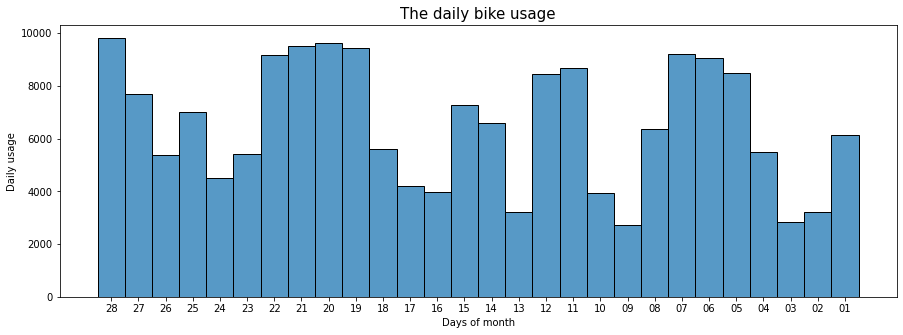

In [ ]:
plt.figure(figsize=(15,5)) #set figure size
sns.histplot(data=data, x="start_day", binwidth=10)
plt.title('The daily bike usage', fontsize=15) #set figure title
plt.ylabel('Daily usage') #set y label
plt.xlabel('Days of month') #set x label
plt.show()

*According to this graph the maximum bike rides are taken from 05 to 07 and 11,12 , from 19 to 22 and 28 of the month*

#### 2. Second Question: What are the Popular start&end station names?

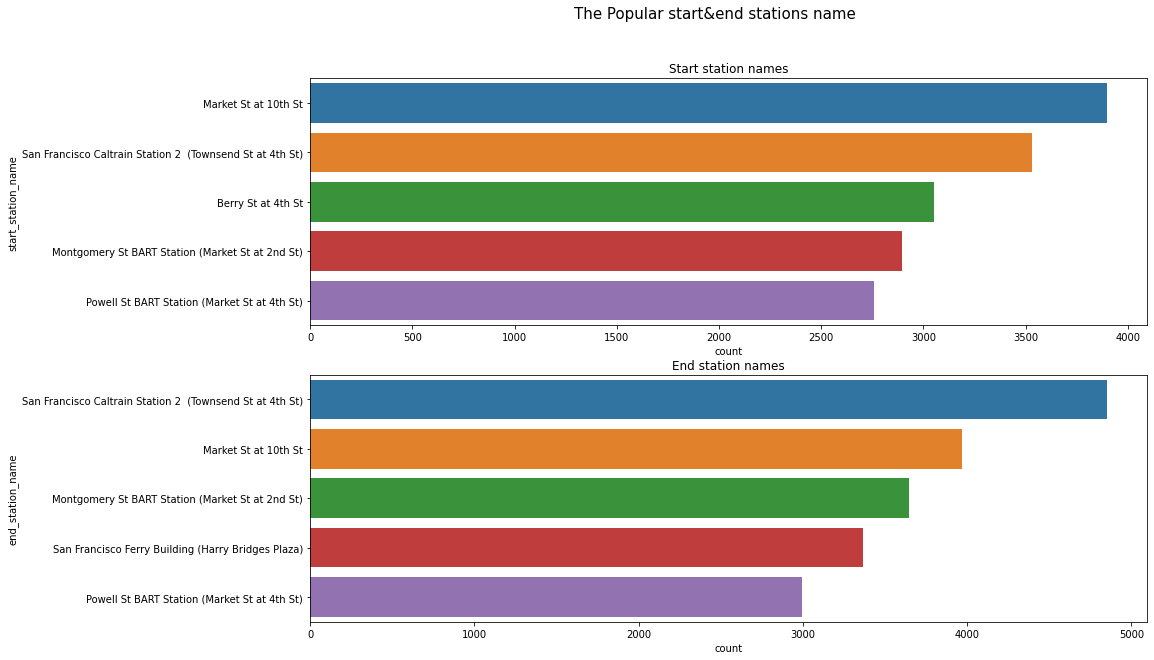

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1) 
ax1 = sns.countplot(y ='start_station_name', data = data, order=data.start_station_name.value_counts().iloc[:5].index)
plt.subplot(2, 1, 2)
ax2 = sns.countplot(y ='end_station_name', data = data, order=data.end_station_name.value_counts().iloc[:5].index)
plt.suptitle('The Popular start&end stations name', fontsize=15)
ax1.set_title('Start station names')
ax2.set_title('End station names')
plt.show()

*here we can see the top 5 start station names and end station names that most users begin and end their rides* 

#### 3. Third Question: Which is the user type that rents bikes the most?

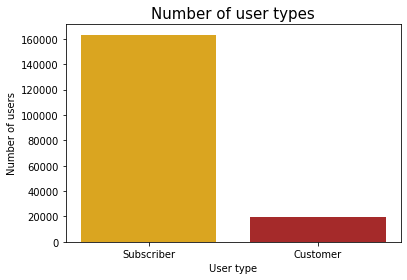

In [ ]:
plt.bar(x=data.user_type.value_counts().keys(), height=data.user_type.value_counts(), color=['goldenrod', 'brown'])
plt.title('Number of user types', fontsize=15)
plt.ylabel('Number of users')
plt.xlabel('User type')
plt.show()

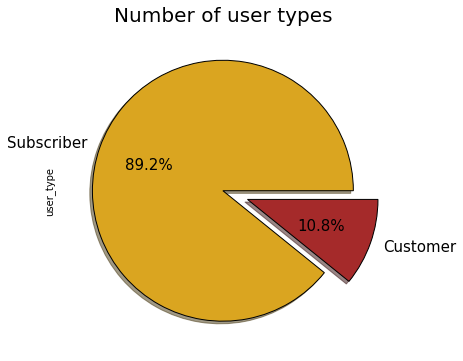

In [ ]:
user_types = data['user_type'].value_counts()
explode = (0, 0.2) #explode to stand out slice
ax = user_types.plot(kind='pie', autopct = '%1.1f%%', explode=explode, colors = ['goldenrod', 'brown'], #autopct: to set the percentage 
                     figsize=(6,6), fontsize=15, shadow=True, wedgeprops={'edgecolor': 'black'})
ax.set_title("Number of user types", fontsize=20)
plt.show()

*From this two graphs it is clearly visible that there more subscriber than customer*

#### 4. Forth Question: What are the ages of the most rented bikes users?

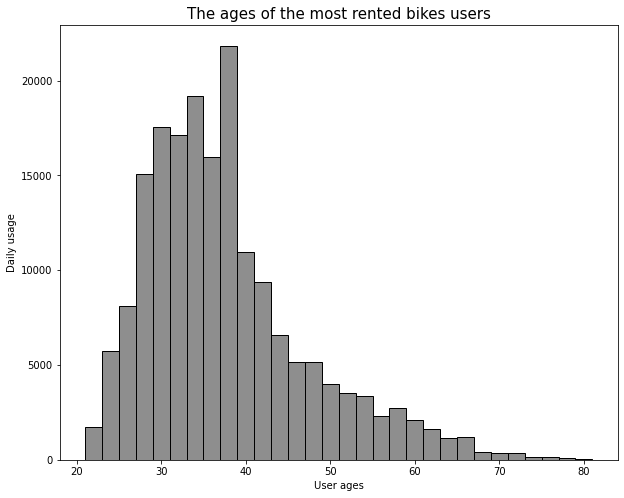

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x="member_age", binwidth=2, color='dimgrey')
plt.title('The ages of the most rented bikes users', fontsize=15)
plt.ylabel('Daily usage')
plt.xlabel('User ages')
plt.show()

*The age of users are around 27 to 40 years*

#### 5. Fifth Question: What is the gender of the most rented bike user?

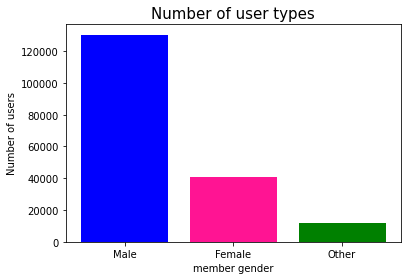

In [ ]:
plt.bar(x=data.member_gender.value_counts().keys(), height=data.member_gender.value_counts(), color=['blue', 'deeppink', 'green'])
plt.title('Number of user types', fontsize=15)
plt.ylabel('Number of users')
plt.xlabel('member gender')
plt.show()

*There are more than 120 thousand male riders and only 40 thousand are female riders*

#### 6. Sixth Question: What are the days of week are most rented by users?

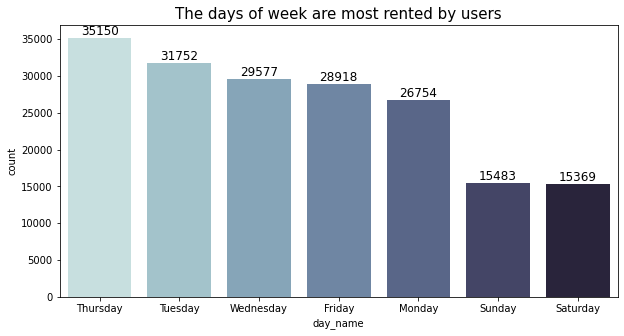

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="day_name", data=data, palette='ch:start=.2,rot=-.3', order = data['day_name'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', color = "black", size=12)
plt.title('The days of week are most rented by users', fontsize=15)
plt.show()

*Most rides are done on Thursday also on Tuesday*

*Most rides are done on weekdays*

#### 7. seventh Question: Average usage of bikes?

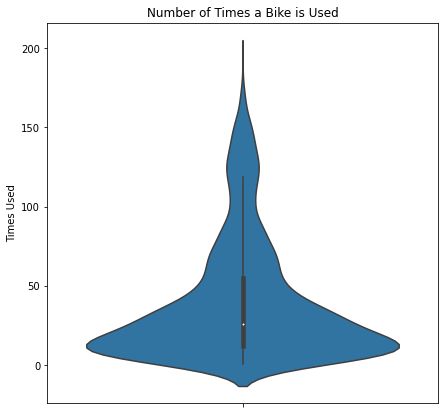

In [ ]:
plt.figure(figsize=(7,7))
count = data['bike_id'].value_counts()
ax=sns.violinplot(y = count)
plt.title('Number of Times a Bike is Used')
plt.ylabel('Times Used')
plt.show()

Most bikes used between 0 to 50 times.

> ### Bivariate Exploration
~ **Bivariate analysis** is finding some kind of empirical relationship between two variables
1. The daily usage of bikes based on User Type?
9. What are the ages of the most rented users of bikes based on gender?
10. What is the gender most rented based on user type?
11. What is the Popular start station names based on user type?
12. What are the most active hours for each day of the week?


#### 1. First Question: The daily usage of bikes based on User Type?

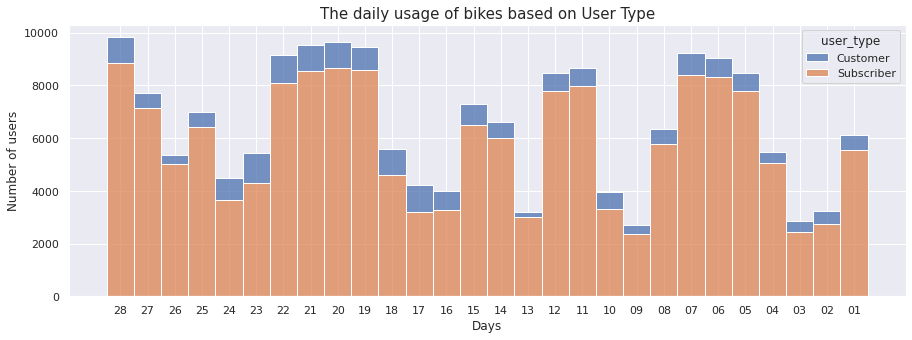

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data=data, x="start_day", hue="user_type", multiple = 'stack')
plt.title('The daily usage of bikes based on User Type', fontsize=15)
plt.ylabel('Number of users')
plt.xlabel('Days')
plt.show()

*The most riders are subscriber and they done there rides on the 6th, 7th and fron 19th to 22th also on 28th of the month*

#### 2. Second Question: What are the ages of the most rented users of bikes based on gender?

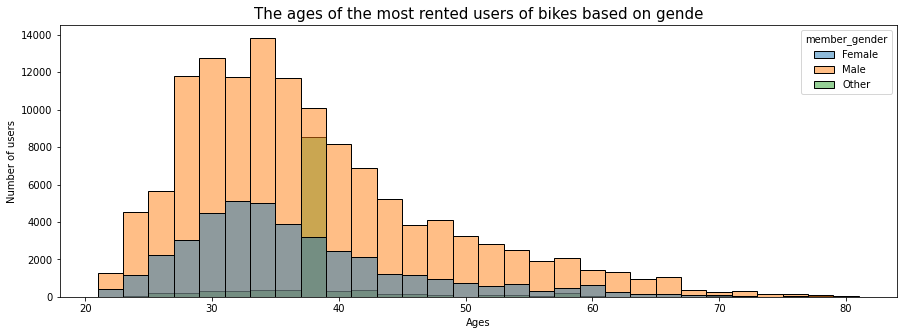

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x="member_age", hue="member_gender", binwidth=2, color='icefire')
plt.title('The ages of the most rented users of bikes based on gende', fontsize=15)
plt.ylabel('Number of users')
plt.xlabel('Ages')
plt.show()

*The most riders are males and their age around 27 to 37*

#### 3. Third Question: What is the gender most rented based on user type?

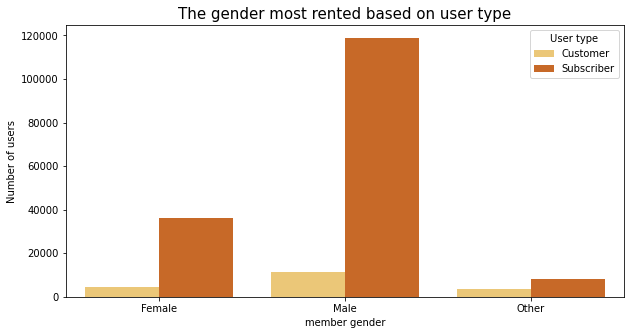

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="member_gender", hue="user_type", data=data, palette="YlOrBr")
plt.title('The gender most rented based on user type', fontsize=15)
plt.ylabel('Number of users')
plt.xlabel('member gender')
plt.legend(title='User type') #set legend title
plt.show()

*The most riders are male subscribers*

#### 4. Forth Question: What is the Popular start station names based on user type?

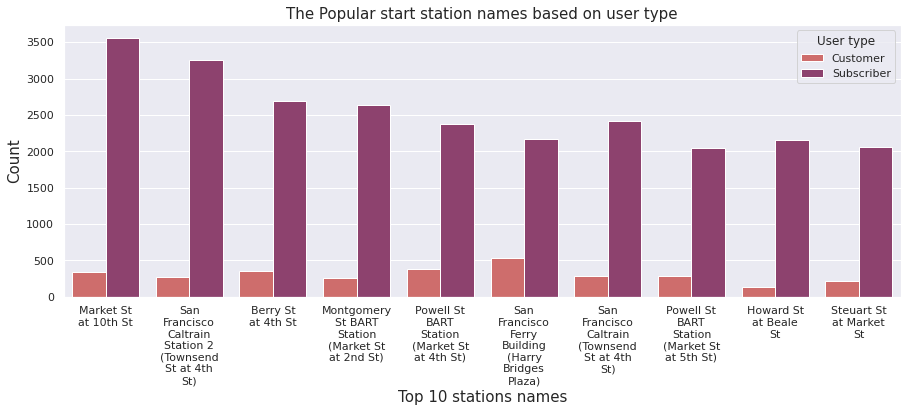

In [ ]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid") #set background color
labels = data.start_station_name.value_counts().iloc[:10].index #save stations name in labels
labels = [ '\n'.join(wrap(l, 10)) for l in labels] #split the station name
ax = sns.countplot(x="start_station_name", hue="user_type", data=data, palette="flare",
                   order=data.start_station_name.value_counts().iloc[:10].index) #order to display just first 10 rows
plt.title('The Popular start station names based on user type', fontsize=15)
ax.set_xticklabels(labels)
ax.set_xlabel("Top 10 stations names", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
plt.legend(title='User type') #set legend title
plt.show()

*Most of subscriber begin their rides at Market st*

*Most of customer begin their rides at San Francisco Ferry Building*

#### 5. Fifth Question: What are the most active hours for each day of the week?

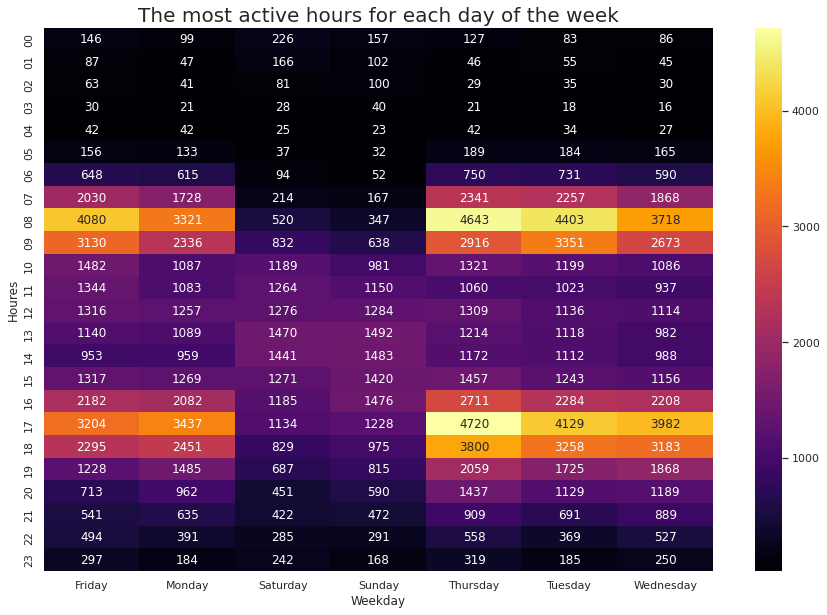

In [ ]:
plt.figure(figsize=(15,10))
x = data.pivot_table(index='start_hour', columns='day_name', aggfunc='size')
sns.heatmap(x, annot=True, fmt="g", cmap="inferno") #annot to write data value in each cell - fmt is the format for the number - cmap the color map
plt.title('The most active hours for each day of the week', fontsize=20)
plt.xlabel('Weekday')
plt.ylabel('Houres')
plt.show()

*From this graph we can see that is the most rides are on working days at 08 am and 05 pm while at the weekend the rides are very few*

> ### Multivariate Exploration
~ **Multivariate analysis** is based on the observation and analysis of more than one variable at the same time
1. The daily usage of bikes based on User Type and Member Gender?
1. What is the Popular start stations name based on user type and gender?
1. What is the Trip Duration based on user type and gender?

#### 1. First Question: The daily usage of bikes based on User Type and Member Gender?

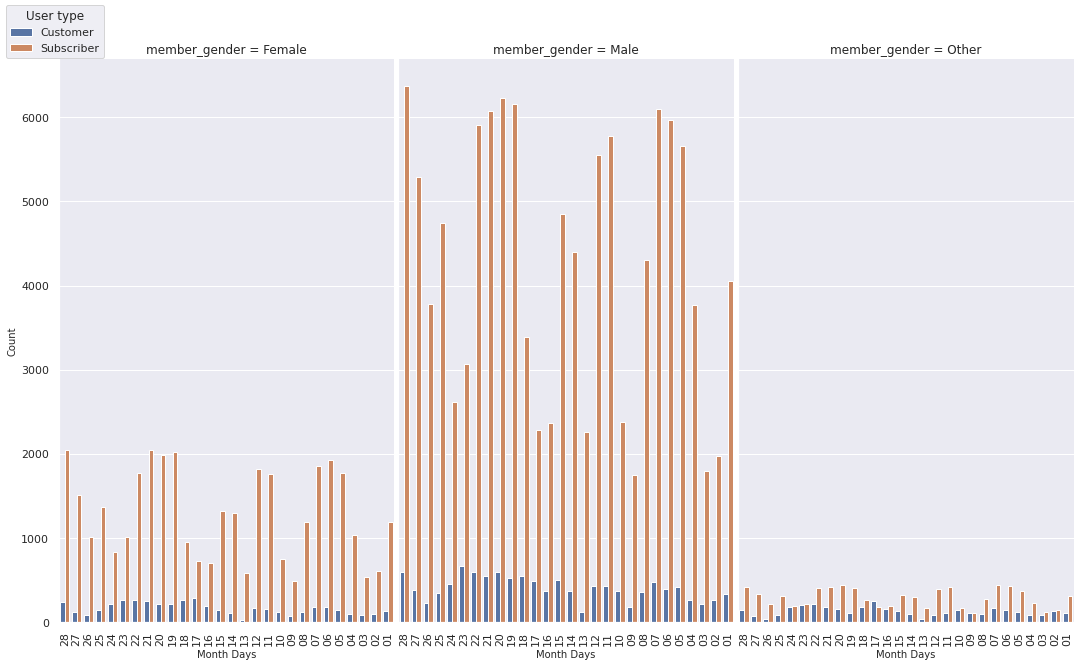

In [ ]:
ax = sns.catplot(x="start_day", hue="user_type", col="member_gender", data=data, kind="count", height=5, aspect=3)
ax.fig.set_size_inches(15,10)
ax.set_xticklabels(rotation=90)
ax.set_xlabels('Month Days', fontsize=10)
ax.set_ylabels('Count', fontsize=10)
sns.move_legend(ax, "upper left", title='User type')
plt.show()

#### 2. Second Question: What is the Popular start stations name based on user type and gender?

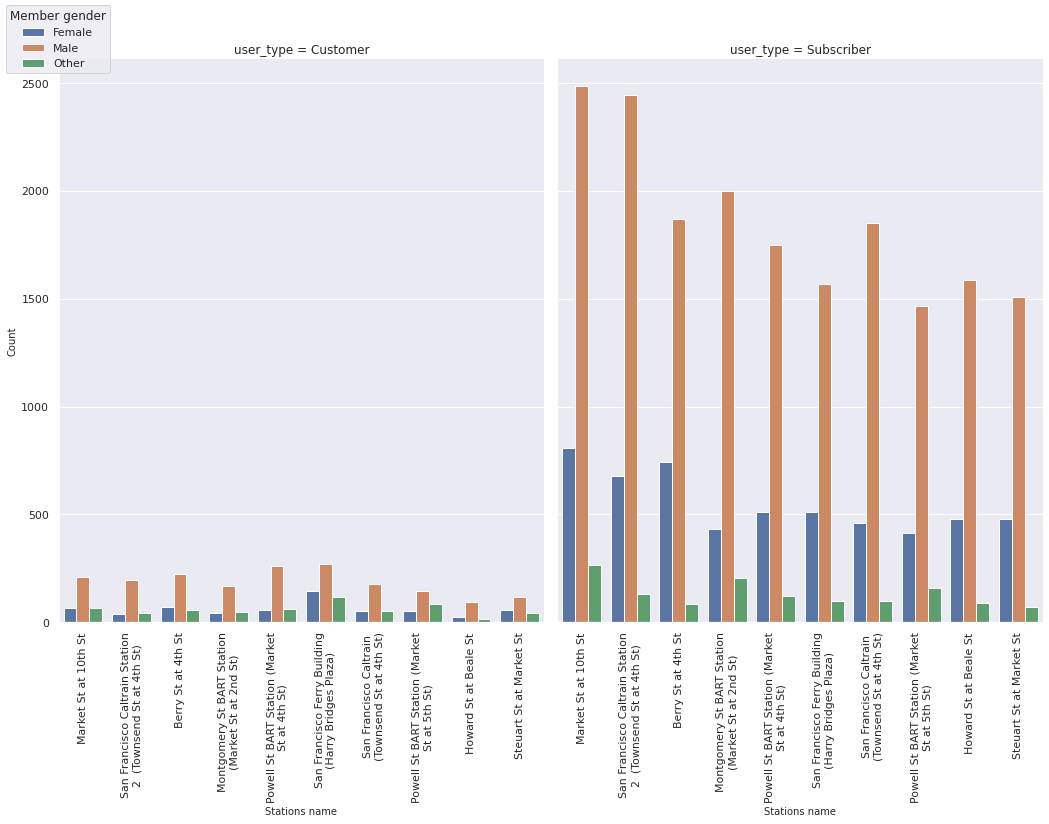

In [ ]:
labels = data.start_station_name.value_counts().iloc[:10].index
labels = [ '\n'.join(wrap(l, 30)) for l in labels]
ax = sns.catplot(x="start_station_name", hue="member_gender", col="user_type", data=data, kind="count",height=5, aspect=3, 
                 order=data.start_station_name.value_counts().iloc[:10].index)
ax.fig.set_size_inches(15,10)
sns.move_legend(ax, "upper left", title='Member gender')
ax.set_xticklabels(labels, rotation=90)
ax.set_xlabels('Stations name', fontsize=10)
ax.set_ylabels('Count', fontsize=10)
plt.show()

#### 3. Third Question: What is the Trip Duration based on user type and gender?

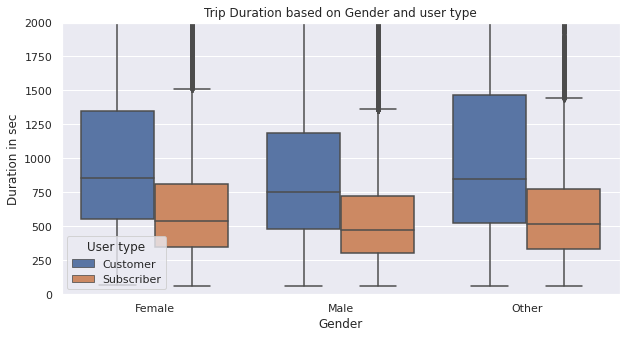

In [ ]:
plt.figure(figsize = [10, 5])
ax = sns.boxplot(data = data, x = 'member_gender', y = 'duration_sec', hue='user_type')
plt.ylim([0, 2000]) #limit y axes (2000 sec is almost 30 min)
plt.title('Trip Duration based on Gender and user type')
plt.xlabel('Gender')
plt.ylabel('Duration in sec')
sns.move_legend(ax, "lower left", title='User type')
plt.show()

*There is no difference in the member gender in terms of duration of the trip, they are all close.*

*The customer takes a longer trip time than the subscriber, regardless of the customer's gender.*